# Simulazione di Rate di Muoni cosmici

In questa simulazione ci occuperemo di studiare il rate R di un flusso di muoni cosmici che impatta su un sistema di due scintillatori:

Supponiamo che ai nostri rivelatori giunga soltanto la parte dura del flusso di raggi cosmici secondari, ovvero i muoni. Questa condizione può essere verificata inserendo un materiale assorbitore prima del primo rivelatore.
I raggi cosmici hanno una distribuzione angolare rispetto alla normale alla superficie della Terra descrivibile
dalla funzione:
$ f(theta) \propto  cos^2(\theta) $

## Librerie da importare

In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.random as rnd
%matplotlib inline 

## Generazione iniziale

Generiamo 100000 Muoni che impattano sulla superficie del primo rivelatore con un angolo theta distribuito come sopra, e x, y  e phi (angolo  sul piano del rivelatore) distribuiti in modo uniforme.

In [26]:
Nmuon= 1000000
X = 10 #Cm
Y = 22 #Cm

#scriviamo la funzione di distribuzione
def F(t):
     return np.cos(t)*np.cos(t)

#cord() genera le coordinate casuali di un evento

def cord():
    x= rnd.uniform(0, X)
    y= rnd.uniform(0, Y)
    phi= rnd.uniform(0, 2*np.pi)
      #qui generiamo theta
    ##per generare theta procediamo nel seguente modo (hit or miss), generiamo theta ed f di theta in modo uniforme 
    ##nel loro intervallo di definizione,se ftheta è minore di Ftheta ovvero valore ottenuto da formula con theta 
    ##generato casualmente allora prendiamo theta altrimenti rifacciamo tutto
    theta= rnd.uniform(0, np.pi*0.5)
    ftheta= rnd.uniform(0,1)
    while ftheta > F(theta):
        theta= rnd.uniform(0, np.pi*0.5)
        ftheta= rnd.uniform(0, 1)
    cord = np.array( [x,y, phi, theta] )
    return cord 



#generiamo gli Nmuon incidenti

inc1=np.array([cord() for i in range(Nmuon) ]) 
print(inc1)

[[ 0.83346261 18.187472    4.97015718  0.4978122 ]
 [ 0.21498268  6.76544528  5.6438204   0.06549135]
 [ 2.09511365  1.02518182  4.75187873  0.66894268]
 ...
 [ 1.06712102  2.7862593   0.64560893  1.1320689 ]
 [ 8.18199391 19.89543809  4.97057758  1.0580209 ]
 [ 5.07927612  9.066674    5.30519572  0.07186751]]


Verifichiamo che le particella siano distribuite correttamente:

<ipython-input-4-3255ac86f957>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis0.set_xticklabels(['{:3.0f}'.format(x * 180/np.pi) for x in axis0.get_xticks()])


[Text(-0.2, 0, '-11'),
 Text(0.0, 0, '  0'),
 Text(0.2, 0, ' 11'),
 Text(0.4000000000000001, 0, ' 23'),
 Text(0.6000000000000001, 0, ' 34'),
 Text(0.8, 0, ' 46'),
 Text(1.0000000000000002, 0, ' 57'),
 Text(1.2000000000000002, 0, ' 69'),
 Text(1.4000000000000001, 0, ' 80'),
 Text(1.6, 0, ' 92'),
 Text(1.8, 0, '103')]

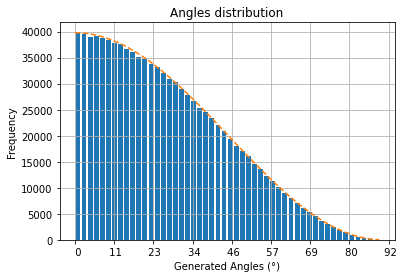

In [4]:
fig0=plt.figure(0)
axis0=fig0.add_subplot(111)
n, bins, patches = axis0.hist(inc1[:,3], bins=50, rwidth=0.80)
axis0.grid(True)
y=F(bins)*n.max()
axis0.plot(bins, y, '--')
axis0.set_xlabel('Generated Angles (°)')
axis0.set_ylabel('Frequency')
axis0.set_title('Angles distribution')
axis0.set_xticklabels(['{:3.0f}'.format(x * 180/np.pi) for x in axis0.get_xticks()])

## Taglio geometrico e di efficienze

A questo punto il nostro obiettivo diventa studiare quante delle particelle rivelate dal primo rivelatore impattano geometricamente sul secondo e ,nota l'efficienza del secondo, quante di queste vengono contate al secondo.
Fissiamo i parametri liberi della simulazione (in seguito li modifichiamo):

In [3]:
d=22 #distanza tra i due scintillatori in cm
e1=0.74 #efficienza primo scintillatore
e2=0.81#efficienza secondo scintillatore

Contiamo i muoni che soddisfino le condizioni di rivelazione:

In [6]:

def rate(d, e1, e2, disx=0, disy=0):  #disx e disy sono i diseallineamenti tra i due scintillatori che saranno considerati in seguito
    
    #definiamo una funzione che calcoli le coordinate di impatto ad una distanza d dal rivelatore superiore
    
    def imp2(arr,d):
        x2=arr[0]-d*np.cos(arr[2])*np.tan(arr[3])
        y2=arr[1]-d*np.sin(arr[2])*np.tan(arr[3])   #arr[3] è la theta
        return [x2,y2]

    #costruiamo una matrice con le coordinate d'impatto sul secondo rivelatore

    inc2=np.array([imp2(inc1[i,:],d) for i in range(Nmuon)])

    #costruiamo due array con le probabilità di passaggio per ciascun rivelatore

    pass1 = rnd.rand(Nmuon)
    pass2 = rnd.rand(Nmuon)

    #costruiamo una matrice che verifichi che tutte le 3 condizioni per la rivelazione siano soddisfatte
    
    count=np.array([pass1[i]<e1 and pass2[i]<e2 and (0+disx)<inc2[i,0]<(X+disx)
                    and (0+disy)<inc2[i,1]<(Y+disy) for i in range(Nmuon)])

    seen=count.sum()
    frac=seen/Nmuon
    exprate=X*Y/60
    rate=exprate*frac
    return rate

testrate=rate(d,e1,e2)

print("\n\nI muoni rivelati sono: ", testrate*60/(X*Y)*Nmuon, "\nLa frazione rivelata è: ", testrate*60/(X*Y) )
print("Considerando un rate atteso di 1 muone per cm² al minuto il rate rivelato atteso è: "+"{0:.2f}".format(testrate)+ " Hz")




I muoni rivelati sono:  203622.99999999997 
La frazione rivelata è:  0.20362299999999997
Considerando un rate atteso di 1 muone per cm² al minuto il rate rivelato atteso è: 0.75 Hz


Stiamo assumendo che i Rivelatori siano posti al livello del mare dove il Rate atteso è di 1 muone al minuto per $cm^2$ (fonte: https://arxiv.org/pdf/1203.0101.pdf).

## Grafici

A questo punto andiamo a studiare in un grafico come varia il rate in funzione della distanza.

In [6]:
#studiamo prima al variare di D e fissiamo e1 ed e2 #lasciamo come esempio quest'ultimo

D= np.array([0, 5, 10, 15, 25, 50]) #Cm
Rated1 = np.array([rate(dd, e1, e2) for dd in D])
Rated2 = np.array([rate(dd, 1, 1) for dd in D])
Rated3 = np.array([rate(dd, 0.5, 0.3) for dd in D])
Rated4 = np.array([rate(dd, 0.5, 0.5) for dd in D])
print(Rated4) 

[0.91463533 0.68368667 0.51827967 0.41036967 0.28059533 0.15352333]


Generiamo il grafico al variare di D.

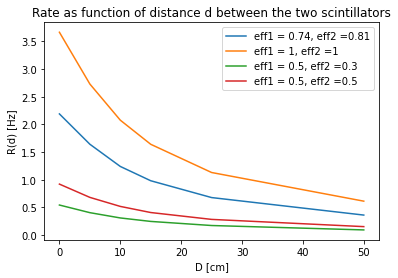

In [81]:
plt.figure(1)
plt.xlabel('D [cm]') 
plt.ylabel('R(d) [Hz]')
plt.title("Rate as function of distance d between the two scintillators")
plt.plot(D, Rated1 , label= 'eff1 = 0.74, eff2 =0.81')
plt.plot(D, Rated2 , label= 'eff1 = 1, eff2 =1')
plt.plot(D, Rated3 , label= 'eff1 = 0.5, eff2 =0.3')
plt.plot(D, Rated4 , label= 'eff1 = 0.5, eff2 =0.5')
plt.legend()
plt.show()

NameError: name 'D' is not defined

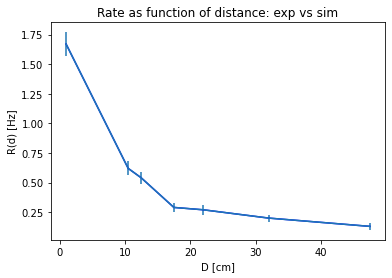

In [7]:
#confronto esperimento con simulazione

dexp=np.array([1,10.5,12.5,17.5,22,32,47.5])
rateexp=np.array([1.67, 0.62, 0.54, 0.29, 0.27, 0.20, 0.13])
derr=np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05])
rateerr=np.array([0.10,0.06,0.05,0.04,0.04,0.03,0.03])

plt.figure(10)
plt.xlabel('D [cm]') 
plt.ylabel('R(d) [Hz]')
plt.title("Rate as function of distance: exp vs sim")
plt.errorbar(dexp, rateexp , xerr=derr, yerr=rateerr, )
plt.plot(dexp, rateexp , label= 'exp',color='b')
plt.plot(D, Rated1 , label= 'sim')
plt.legend()
plt.show()

Vogliamo considerare gli effetti sul rate di un possibile disallineamento di un cm tra i due rivelatori in entrambe le direzioni x e y

In [83]:
disx=2
disy=2
Rated1dis = np.array([rate(dd, 0.74, 0.81, disx, disy) for dd in D])

Generiamo un grafico con delle bande di incertenza che includano gli effetti del possibile disallineamento per due delle curve precedenti

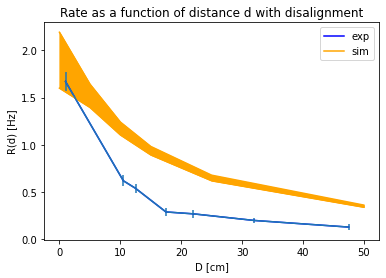

In [84]:
plt.figure(2)
plt.xlabel('D [cm]') 
plt.ylabel('R(d) [Hz]')
plt.title("Rate as a function of distance d with disalignment")

plt.errorbar(dexp, rateexp , xerr=derr, yerr=rateerr )
plt.plot(dexp, rateexp, label= 'exp', color='blue')
plt.plot(D, Rated1 , label= 'sim', color='orange')
plt.plot(D, Rated1dis, color='orange')
plt.fill_between(D,Rated1, Rated1dis, color='orange')
plt.legend()
plt.show()

Studiamo un ulteriore caso particolare, l'efficienza dei due rivelatori è la stessa, e fissato d, vediamo come varia R al variare dell'efficienza:

In [85]:
E= np.array([0, 0.05, 0.10, 0.15, 0.22, 0.3, 0.4, 0.50])

Ratef1 = np.array([rate(22, Ev, Ev) for Ev in E])
Ratef2 = np.array([rate(50, Ev, Ev) for Ev in E])
Ratef3 = np.array([rate(0, Ev, Ev) for Ev in E])


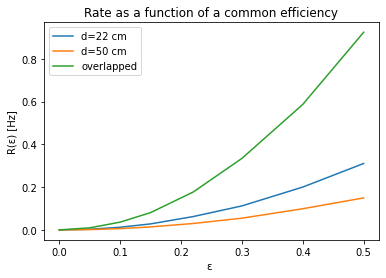

In [86]:
plt.figure(3)
plt.xlabel('ε ') 
plt.ylabel('R(ε) [Hz]')
plt.title("Rate as a function of a common efficiency")
plt.plot(E, Ratef1 , label= 'd=22 cm')
plt.plot(E, Ratef2 , label= 'd=50 cm')
plt.plot(E, Ratef3 , label= 'overlapped')
plt.legend()
plt.show()

## Micromegas chambers

Si vuole ora considerare il caso in cui ci sia anche una camera micromegas posta tra i due scintillatori

In [7]:
#definiamo le dimensioni della camera
Xmm=2*10/3
Ymm=10

#definiamo una nuova funzione rate che consideri anche la presenza della camera
#chiamiamo con z la distanza dal rivelatore superiore, con posx e posy le distanze della camera 
#rispetto lo spigolo del rivelatore superiore (come valore di default è considerato il caso della camera centrata)

def ratemm(d, z, e1, e2, posx=(X-Xmm)/2, posy=(Y-Ymm)/2, disx=0,  disy=0):
    
    #definiamo una funzione che calcoli le coordinate di impatto ad una distanza d dal rivelatore superiore
    
    def imp2(arr,d):
        x2=arr[0]-d*np.cos(arr[2])*np.tan(arr[3])
        y2=arr[1]-d*np.sin(arr[2])*np.tan(arr[3])
        return [x2,y2]
    

    #costruiamo una matrice con le coordinate d'impatto sul secondo rivelatore

    inc2=np.array([imp2(inc1[i,:],d) for i in range(Nmuon)])
    
    #costruiamo una matrice con le coordinate d'impatto sulla camera
    
    inc3=np.array([imp2(inc1[i,:],z) for i in range(Nmuon)])
    
    #costruiamo due array con le probabilità di passaggio per ciascun rivelatore

    pass1 = rnd.rand(Nmuon)
    pass2 = rnd.rand(Nmuon)

    #costruiamo una matrice che verifichi che tutte le 4 condizioni per la rivelazione siano soddisfatte
    
    count=np.array([pass1[i]<e1 and pass2[i]<e2 and (0+disx)<inc2[i,0]<(X+disx) and (0+disy)<inc2[i,1]<(Y+disy)
                    and posx<inc3[i,0]<(posx+Xmm) and posy<inc3[i,1]<(posy+Ymm) for i in range(Nmuon)])

    seen=count.sum()
    frac=seen/Nmuon
    exprate=X*Y/60
    rate=exprate*frac
    return rate



In [9]:
z=d-13
testratem=ratemm(d,z,e1,e2)

print("\n\nI muoni rivelati sono: ", testratem*60/(X*Y)*Nmuon, "\nLa frazione rivelata è: ", testratem*60/(X*Y) )
print("Considerando un rate atteso di 1 muone per cm² al minuto il rate rivelato atteso è: "+"{0:.2f}".format(testratem)+ " Hz")
print("\n: la frazione delle volte in cui i muoni triggerano il sistema ma non passano dalla camera è:", (testrate-testratem)/testrate)



I muoni rivelati sono:  93088.0 
La frazione rivelata è:  0.093088
Considerando un rate atteso di 1 muone per cm² al minuto il rate rivelato atteso è: 0.34 Hz

: la frazione delle volte in cui i muoni triggerano il sistema ma non passano dalla camera è: 0.5428414275401109


Nel caso in esame la camera ha una superficie che è la metà dei due scintillatori, conseguentemente il rate stimato è circa la metà del primo calcolato

Grafichiamo l'andamento del rate per due scintillatori a venti cm di distanza e posizione della camera variabile 

In [10]:
h=22

Z= np.array([0, 3, 6, 9, 10, 11, 14, 17 ,22]) 
Rated1mm = np.array([ratemm(h, dis, e1, e2) for dis in Z]) #posizione centrata
Rated2mm = np.array([ratemm(h, dis, e1, e2, 0, 0) for dis in Z]) #camera allineata ad uno spigolo dello scintillatore


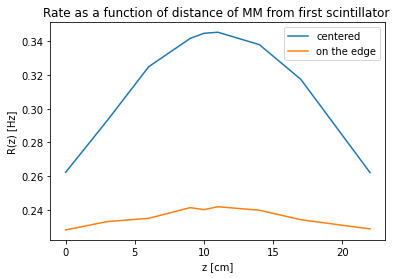

In [11]:
plt.figure(4)
plt.xlabel('z [cm]') 
plt.ylabel('R(z) [Hz]')
plt.title("Rate as a function of distance of MM from first scintillator ")
plt.plot(Z, Rated1mm , label= 'centered')
plt.plot(Z, Rated2mm , label= 'on the edge')
plt.legend()
plt.show()

Qui studiamo la distribuzione angolare dei muoni che vengono rivelati anche dalla camera a distanza diversa.

In [12]:
def anglesmm(d, z, e1, e2, posx=(X-Xmm)/2, posy=(Y-Ymm)/2, disx=0,  disy=0):
    
    #definiamo una funzione che calcoli le coordinate di impatto ad una distanza d dal rivelatore superiore
    
    def imp2(arr,d):
        x2=arr[0]-d*np.cos(arr[2])*np.tan(arr[3])
        y2=arr[1]-d*np.sin(arr[2])*np.tan(arr[3])
        return [x2,y2]
    

    #costruiamo una matrice con le coordinate d'impatto sul secondo rivelatore

    inc2=np.array([imp2(inc1[i,:],d) for i in range(Nmuon)])
    
    #costruiamo una matrice con le coordinate d'impatto sulla camera
    
    inc3=np.array([imp2(inc1[i,:],z) for i in range(Nmuon)])
    
    #costruiamo due array con le probabilità di passaggio per ciascun rivelatore

    pass1 = rnd.rand(Nmuon)
    pass2 = rnd.rand(Nmuon)

    #costruiamo una matrice che verifichi che tutte le 4 condizioni per la rivelazione siano soddisfatte
    
    count=np.array([pass1[i]<e1 and pass2[i]<e2 and (0+disx)<inc2[i,0]<(X+disx) and (0+disy)<inc2[i,1]<(Y+disy)
                    and posx<inc3[i,0]<(posx+Xmm) and posy<inc3[i,1]<(posy+Ymm) for i in range(Nmuon)])
    
    angles=np.array([inc1[i,3] for i in range(Nmuon) if count[i]])
    
    return angles    

In [13]:
ang22=anglesmm(22, 22-13, e1, e2)
ang50=anglesmm(50, 50-13, e1, e2)

<ipython-input-15-2755c342f9d2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis0.set_xticklabels(['{:3.0f}'.format(x * 180/np.pi) for x in axis0.get_xticks()])


[Text(0.0, 0, '  0'),
 Text(0.1, 0, '  6'),
 Text(0.2, 0, ' 11'),
 Text(0.30000000000000004, 0, ' 17'),
 Text(0.4, 0, ' 23'),
 Text(0.5, 0, ' 29'),
 Text(0.6000000000000001, 0, ' 34'),
 Text(0.7000000000000001, 0, ' 40'),
 Text(0.8, 0, ' 46')]

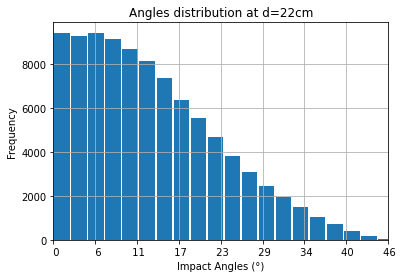

In [15]:
fig0=plt.figure(0)
axis0=fig0.add_subplot(111)
n, bins, patches = axis0.hist(ang22, bins=20, rwidth=0.9 )
axis0.grid(True)
y=n.max()
axis0.set_xlim([0,0.8])
axis0.set_xlabel('Impact Angles (°)')
axis0.set_ylabel('Frequency')
axis0.set_title('Angles distribution at d=22cm')
axis0.set_xticklabels(['{:3.0f}'.format(x * 180/np.pi) for x in axis0.get_xticks()])

<ipython-input-16-1e38bbef11ba>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis0.set_xticklabels(['{:3.0f}'.format(x * 180/np.pi) for x in axis0.get_xticks()])


[Text(0.0, 0, '  0'),
 Text(0.1, 0, '  6'),
 Text(0.2, 0, ' 11'),
 Text(0.30000000000000004, 0, ' 17'),
 Text(0.4, 0, ' 23'),
 Text(0.5, 0, ' 29'),
 Text(0.6000000000000001, 0, ' 34'),
 Text(0.7000000000000001, 0, ' 40'),
 Text(0.8, 0, ' 46')]

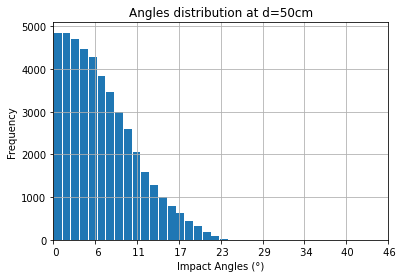

In [16]:
fig0=plt.figure(0)
axis0=fig0.add_subplot(111)
n, bins, patches = axis0.hist(ang50, bins=20, rwidth=0.9 )
axis0.grid(True)
y=n.max()
axis0.set_xlim([0,0.8])
axis0.set_xlabel('Impact Angles (°)')
axis0.set_ylabel('Frequency')
axis0.set_title('Angles distribution at d=50cm')
axis0.set_xticklabels(['{:3.0f}'.format(x * 180/np.pi) for x in axis0.get_xticks()])

In [99]:
Nmuon= 3000000
X = 10 #Cm
Y = 22 #Cm
Xmm=10*2/3
Ymm=10
e1 = 0.74
e2 = 0.81


#scriviamo la funzione di distribuzione
def F(t):
     return np.cos(t)*np.cos(t)

#cord() genera le coordinate casuali di un evento

def cord():
    x= rnd.uniform(0, X)
    y= rnd.uniform(0, Y)
    phi= rnd.uniform(0, 2*np.pi)
      #qui generiamo theta
    ##per generare theta procediamo nel seguente modo (hit or miss), generiamo theta ed f di theta in modo uniforme 
    ##nel loro intervallo di definizione,se ftheta è minore di Ftheta ovvero valore ottenuto da formula con theta 
    ##generato casualmente allora prendiamo theta altrimenti rifacciamo tutto
    theta= rnd.uniform(0, np.pi*0.5)
    ftheta= rnd.uniform(0,1)
    while ftheta > F(theta):
        theta= rnd.uniform(0, np.pi*0.5)
        ftheta= rnd.uniform(0, 1)
    cord = np.array( [x,y,0, phi, theta] )
    return cord 



#generiamo gli Nmuon incidenti

inc1=np.array([cord() for i in range(Nmuon) ]) 
print(inc1)

[[ 8.28134323  9.72319613  0.          2.38214026  0.85996365]
 [ 8.11473293  4.3034298   0.          5.8306627   0.91265175]
 [ 6.82566253  5.56810398  0.          2.35810769  0.66133091]
 ...
 [ 7.03433955  5.06787701  0.          1.55546117  0.7285411 ]
 [ 8.24693304  7.41827659  0.          3.92757206  1.21559563]
 [ 4.21608785 18.31551962  0.          3.76635212  0.26422755]]


In [100]:
#definiamo una nuova funzione che restituisca l'angolo di impatto rispetto il piano effettivamente osservato dalla camera
#bisogna tenere in conto che la camera ricostruisce l'angolo tramite l'arcotg
def cam_angles(d, alpha, e1, e2):
    
    #definiamo una funzione che calcoli le coordinate di impatto ad una distanza d dal rivelatore superiore
    #nota che stiamo condiderando un sitema con origine nello spigolo dello scintillatore inferiore !!! la quota della camera è fissata a 13 cm
    
    def imp2(arr,d):
        x2=arr[0]+d*np.cos(arr[3])*np.tan(arr[4])
        y2=arr[1]+d*np.sin(arr[3])*np.tan(arr[4])
        return [x2,y2,d]
    

    #costruiamo una matrice con le coordinate d'impatto sul secondo rivelatore

    inc2=np.array([imp2(inc1[i,:],d) for i in range(Nmuon)])
    
    #definiamo una funzione che trasformi i punti nelle coordinate nel sitema della camera inclinata di un angolo alpha con origine nello spigolo della stessa
    def coor_incl(arr, alpha):
        x3=(arr[0])*np.cos(alpha)-(arr[2]-13)*np.sin(alpha)
        z3=(arr[0])*np.sin(alpha)+(arr[2]-13)*np.cos(alpha)
        y3=(arr[1]-6)
        return[x3,y3,z3]
    
    #calcoliamo le coordinate dei due punti nelle nuove coordinate:
    
    punto_1=np.array([coor_incl(inc1[i,:],alpha) for i in range(Nmuon)])
    punto_2=np.array([coor_incl(inc2[i,:],alpha) for i in range(Nmuon)])
    
    
    #definiamo una funzione che dati due punti calcoli la loro intersezione con il piano z=0
    
    def cam_point(punto1,punto2):
        t=punto1[2]/(punto1[2]-punto2[2])
        x=punto1[0]+(punto2[0]-punto1[0])*t
        y=punto1[1]+(punto2[1]-punto1[1])*t
        return [x,y]
    
    #calcoliamo i punti di impatto
    
    impact_cam=np.array([cam_point(punto_1[i,:],punto_2[i,:]) for i in range(Nmuon)])
    
    

    #definiamo la funzione che restituisca gli angoli nel sistema della camera:
    def cam_angle(punto1,punto2):
        a=np.sqrt((punto2[0]-punto1[0])**2+(punto2[1]-punto1[1])**2)
        phi=np.arctan((punto2[1]-punto1[1])/(punto2[0]-punto1[0]))
        theta=np.arctan(np.cos(phi)*a/np.abs(punto2[2]-punto1[2]))
        return theta
    
    impact_angle=np.array([cam_angle(punto_1[i,:],punto_2[i,:]) for i in range(Nmuon)])
    
    
    #costruiamo due array con le probabilità di passaggio per ciascun rivelatore

    pass1 = rnd.rand(Nmuon)
    pass2 = rnd.rand(Nmuon)
    
        
    #costruiamo una matrice che verifichi che tutte le condizioni per la rivelazione siano soddisfatte
    
    count=np.array([pass1[i]<e1 and pass2[i]<e2 and (0)<inc2[i,0]<(X) and (0)<inc2[i,1]<(Y)
                    and 0<impact_cam[i,0]<Xmm and 0<impact_cam[i,0]<Ymm for i in range(Nmuon)])
    
 
    
    recorded_angles=np.array([impact_angle[i] for i in range(Nmuon) if count[i]])
    return recorded_angles   

In [101]:
recorded_angles=cam_angles(50, 20*np.pi/180, e1, e2 )

<ipython-input-109-2c752ea22338>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis0.set_xticklabels(['{:3.0f}'.format(x * 180/np.pi) for x in axis0.get_xticks()])


[Text(0.1, 0, '  6'),
 Text(0.15000000000000002, 0, '  9'),
 Text(0.2, 0, ' 11'),
 Text(0.25, 0, ' 14'),
 Text(0.30000000000000004, 0, ' 17'),
 Text(0.35, 0, ' 20'),
 Text(0.4, 0, ' 23'),
 Text(0.45000000000000007, 0, ' 26'),
 Text(0.5, 0, ' 29'),
 Text(0.55, 0, ' 32'),
 Text(0.6, 0, ' 34')]

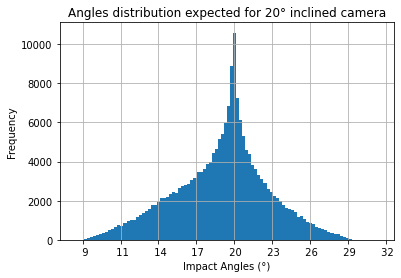

In [109]:
fig0=plt.figure(0)
axis0=fig0.add_subplot(111)
axis0.hist(recorded_angles,range=(8*np.pi/180,31*np.pi/180), bins=100)
axis0.grid(True)
y=n.max()
axis0.set_xlabel('Impact Angles (°)')
axis0.set_ylabel('Frequency')
axis0.set_title('Angles distribution expected for 20° inclined camera')
axis0.set_xticklabels(['{:3.0f}'.format(x * 180/np.pi) for x in axis0.get_xticks()])


In [103]:
recorded_angles2=cam_angles(50, 38*np.pi/180, e1, e2 )

<ipython-input-110-7e06cd909b0e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis0.set_xticklabels(['{:3.0f}'.format(x * 180/np.pi) for x in axis0.get_xticks()])


[Text(0.30000000000000004, 0, ' 17'),
 Text(0.4, 0, ' 23'),
 Text(0.5, 0, ' 29'),
 Text(0.6000000000000001, 0, ' 34'),
 Text(0.7000000000000001, 0, ' 40'),
 Text(0.8, 0, ' 46'),
 Text(0.9000000000000001, 0, ' 52')]

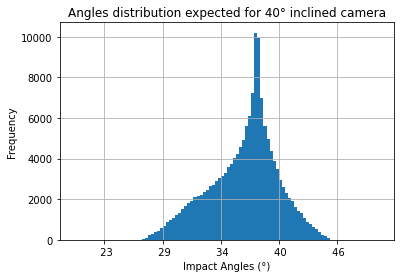

In [110]:
fig0=plt.figure(0)
axis0=fig0.add_subplot(111)
axis0.hist(recorded_angles2, range=(20*np.pi/180,50*np.pi/180), bins=100)
axis0.grid(True)
y=n.max()
axis0.set_xlabel('Impact Angles (°)')
axis0.set_ylabel('Frequency')
axis0.set_title('Angles distribution expected for 40° inclined camera')
axis0.set_xticklabels(['{:3.0f}'.format(x * 180/np.pi) for x in axis0.get_xticks()])
